# 08. 직교 행렬과 QR분해

In [34]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec

import matplotlib_inline.backend_inline
plt.rcParams.update({'font.size':14})

<br>

## 08.01. 직교 행렬

<br>

### 직교 행렬 (orthogonal matrix)
- QR 분해, 고윳값 분해, 특잇값 분해 등에 사용

    (Q는 직교 행렬을 나타내는 데 사용)

<br>

### 직교 행렬의 속성
- **모든 행렬 원소에 동일한 회전 각도가 적용된 변환 행렬 (순수 회전 행렬)은 직교 행렬**
- **행렬의 행을 서로 바꾸는데 사용되는 치환 행렬은 직교 행렬**

<br>

#### 직교 열
- **행렬의 모든 열은 서로 직교**

<br>

#### 단위 노름 열
- **모든 열은 자기자신과의 내적은 1이지만, 다른 열과의 내적은 0**

$$<q_i, q_j> = \begin{cases}0,\;\;if i\neq j\\ 1,\;\;if i=j \end{cases}$$


- **행렬의 전치를 곱하면 열들사이의 모든 내적을 구할 수 있기에,** 

    **$Q^T$의 행은 $Q$의 열과 같고, 행렬 곱셈은 왼쪽 행렬의 모든 행과 오른쪽 행렬의 모든 열 사이의 내적으로 이루어짐**
    
    **$\rightarrow$ 따라서, 직교행렬은**
    
    $$Q^T Q =I$$

    **정방 직교행렬은**
    
    $$Q^TQ = QQ^T = Q^{-1}Q = QQ^{-1} = I$$
    
    $\rightarrow$ **즉 직교 행렬은, 역행렬과 전치행렬이 동일한 행렬**

<br>

- **직교 행렬을 통해 벡터를 회전시킬 수는 있지만, 벡터의 크기를 조정할 수는 없음**

$$||v|| = v^T v$$

$$||Qv|| = (Qv)^T Qv = v^T Q^T Qv$$

- 정방 직교 행렬은 모든 특잇값(및 그 고윳값)이 1
    - 유도된 2-노름이 1이고, 프로베니우스 노름이 $M$ (행의 수)

<br>

- 아래의 두 행렬 모두 직교 행렬

In [35]:
Q1 = np.array([ [1,-1],[1,1] ]) / np.sqrt(2)
Q2 = np.array([ [1,2,2],[2,1,-2],[-2,2,-1] ]) / 3

print(Q1, '\n')
print(Q2)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 

[[ 0.33333333  0.66666667  0.66666667]
 [ 0.66666667  0.33333333 -0.66666667]
 [-0.66666667  0.66666667 -0.33333333]]


In [36]:
print( np.round(Q1.T @ Q1,8) ), print(' ')

print( np.round(Q2.T @ Q2,8) )

[[1. 0.]
 [0. 1.]]
 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


<br>

## 08.02. 그람-슈미트 과정 (GS 과정)
- 비직교 행렬을 직교 행렬로 변환하는 방법
- 학문적으로는 가치가 높지만, 응용 가치는 매우 낮음
    
    - 작은 숫자로 나눗셈과 곱셈을 많이 수행하면 수치적으로 불안정성이 증가하기 때문
    
- 하우스홀더 변환 (Householder reflection)같은 정교하고 수치적으로 안정적인 QR 분해 방법도 존재
    
<br>

- **열 $v_1$부터 $v_n$까지로 구성된 행렬 $V$는 아래의 방법에 따라, 열 $q_k$를 갖는 직교 행렬 $Q$로 변환**
>
> $V$의 모든 열벡터는 첫 번째(가장 왼쪽)부터 시작하여 마지막(가장 오른쪽)까지 차례로 이동
>
> 1. 직교벡터 분해를 사용하여 $v_k$를 행렬 $Q$의 모든 이전 열과 직교화
>
>   즉, $q_{k-1}, q_{k-2} \dots q_1$까지의 모든 열과 수직인 $v_k$의 원소를 계산
>
>   이렇게 직교화된 벡터는 $v^+_k$
>
>   (첫 번째 열 벡터는 선행 벡터가 없기 때문에, 직교화가 되지 않으므로 다음 정규화 단계부터 시작)
>
>
> 2. $v^+_k$를 단위 길이로 정규화 $\rightarrow$ $Q$행렬의 $k$번째 열인 $q_k$가 됨

<br>

#### 그람-슈미트 과정 구현

- $4\times4$난수 행렬

In [42]:
m = 4
n = 4
A = np.random.randn(m,n)

In [43]:
Q = np.zeros((m,n))

- GS 과정

In [ ]:
for i in range(n):
    
    Q[:,i] = A[:,i]
    
    # 직교화
    a = A[:,i] 
    for j in range(i):
        q = Q[:,j] 
        Q[:,i]=Q[:,i]-np.dot(a,q)/np.dot(q,q)*q
    
    Q[:,i] = Q[:,i] / np.linalg.norm(Q[:,i])

- 파이썬으로 계산된 $Q$와의 비교
    - 알고리즘 및 구현의 사소한 차이에 따라 벡터가 뒤집힐 수가 있기에
    
        한 쪽의 0이 아닌 열이 다른 쪽에서 0이 됨

In [45]:
Q2,R = np.linalg.qr(A)

- 차이

In [48]:
print( np.round( Q-Q2 ,10) )

[[ 0.          0.         -0.          1.22223746]
 [ 0.          0.         -0.          1.21223216]
 [ 0.          0.          0.          0.95859281]
 [ 0.          0.         -0.         -0.34311602]]


- 합

In [47]:
print( np.round( Q+Q2 ,10) )

[[-1.09469666 -1.04952249  0.45417766  0.        ]
 [ 1.54943676 -0.29428337 -0.20769255 -0.        ]
 [-0.61601336  1.35841461 -0.92538485  0.        ]
 [-0.14633    -0.98316306 -1.70124935  0.        ]]


<br>

## 08.03. QR 분해

<br>

$$A = QR$$

$$Q^T A = Q^T Q R$$

$$Q^TA=R$$

- GS는 행렬을 직교 행렬 $Q$로 변환
- **원래 행렬이 직교 행렬이 아니라고 가정할 때, $Q$는 원래 행렬에 대한 정보가 손실된 행렬**
    - **GS는 일련의 선형 변환이기 때문에, 손실된 정보는 $Q$에 곱하는 다른 행렬 $R$에 쉽게 복구해서 저장 가능**


- **$R$ 행렬은 항상 상삼각 행렬**
    - **직교화는 왼쪽에서 오른쪽으로 열 단위로 처리되기 때문에, $Q$의 아래쪽 열은 $A$의 위쪽 열과 직교**
    - 따라서 $R$의 하삼각은 직교화된 벡터 쌍으로 이루어짐
    
        $Q$의 위쪽 열은 $A$의 아래쪽 열과 직교하지 않으므로, 내적이 0이 되지 않음
        

<br>

#### `np.linalg.qr()`
- `mode` : `complete`면 전체 분해 / `reduced`면 축소 분해 (default)

<br>

#### QR 분해 계산

In [37]:
A = np.random.randn(6,6)

Q, R = np.linalg.qr(A)

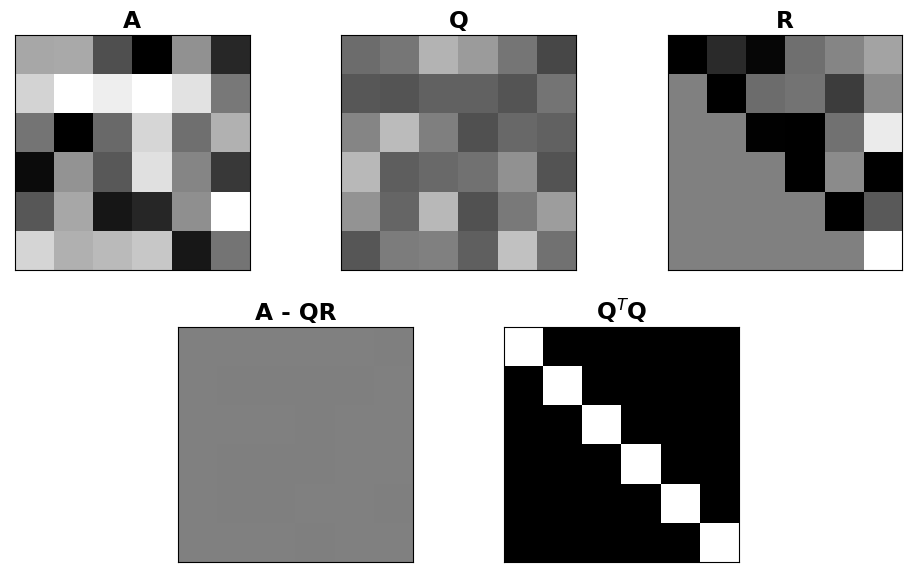

In [38]:
fig = plt.figure(figsize=(10,6))
axs = [0]*5
c = 1.5 

gs1 = gridspec.GridSpec(2,6)
axs[0] = plt.subplot(gs1[0,:2])
axs[0].imshow(A,vmin=-c,vmax=c,cmap='gray')
axs[0].set_title('A',fontweight='bold')

axs[1] = plt.subplot(gs1[0,2:4])
axs[1].imshow(Q,vmin=-c,vmax=c,cmap='gray')
axs[1].set_title('Q',fontweight='bold')

axs[2] = plt.subplot(gs1[0,4:6])
axs[2].imshow(R,vmin=-c,vmax=c,cmap='gray')
axs[2].set_title('R',fontweight='bold')

axs[3] = plt.subplot(gs1[1,1:3])
axs[3].imshow(A - Q@R,vmin=-c,vmax=c,cmap='gray')
axs[3].set_title('A - QR',fontweight='bold')

axs[4] = plt.subplot(gs1[1,3:5])
axs[4].imshow(Q.T@Q,cmap='gray')
axs[4].set_title(r'Q$^T$Q',fontweight='bold')

for a in axs:
  a.set_xticks([])
  a.set_yticks([])

plt.tight_layout()
plt.show()

<br>

### $Q$와 $R$의 크기
- $Q$와 $R$의 크기는 분해될 행렬 $A$의 크기와 QR 분해가 '경제형'('축소')인지 '완전형'('전체')인지에 따라 달라짐
    - **높은 행렬에서 열이 $N$개인 $Q$ 행렬을 생성 = 경제형 (축소)분해 $\rightarrow$ 높은 $Q$ 행렬**
      
    - **높은 행렬에서 열이 $M$개인 $Q$ 행렬을 생성 = 완전형 (전체)분해 $\rightarrow$ 정방 $Q$ 행렬**
<br>

- $Q$의 계수는 항상 최대한으로 가능한 계수, 따라서
    
    모든 정방 $Q$ 행렬에서의 계수는 $M$ (행의 개수), 경제형 $Q$에서의 계수는 $N$ (열의 개수)

<br>

- $4 \times 14$의 넓은 행렬에 대한 경제 분해

In [39]:
M = 4
N = 14

A = np.random.randn(M,N)

In [40]:
Q, R = np.linalg.qr(A)

print(f'A의 차원: {A.shape}')
print(f'Q의 차원: {Q.shape}')
print(f'R의 차원: {R.shape}')

A의 차원: (4, 14)
Q의 차원: (4, 4)
R의 차원: (4, 14)


- $2\times 1$ 높은 행렬에 대한 완전 분해

In [41]:
A = np.array([ [1,-1] ]).T

Q, R = np.linalg.qr(A,'complete')
print(f'A의 차원: {A.shape}')
print(f'Q의 차원: {Q.shape}')
print(f'R의 차원: {R.shape}')

A의 차원: (2, 1)
Q의 차원: (2, 2)
R의 차원: (2, 1)


<br>

- 직교화로 인한 $Q$와 $A$의 계수 차이는 $A$의 열공간이 $\mathbb{R}^M$의 저차원 하위 공간일지라도, 

    $Q$는 $\mathbb{R}^M$ 전체를 생성한다는 것을 의미

<br>

- **QR 분해는 모든 행렬의 크기와 계수에 대해 고유하지 않음**

    즉, $Q_1 \neq Q_2$인 $A=Q_1 R_1$과 $A=Q_2 R_2$를 구할 수 있음
    
    **추가 제약 조건 (예: $R$의 모든 대각선의 값이 양수)이 존재하면, QR 분해를 고유하게 만들 수 있음**

<br>

### QR 분해와 역
- **QR 분해를 통하여, 역행렬을 수치적으로 더 안정적으로 계산할 수 있음**

$$A = QR$$

$$A^{-1} = (QR)^{-1}$$

$$A^{-1} = R^{-1}Q^{-1}$$

$$Q^{-1} = R^{-1}Q^T$$

- **따라서 $A$의 역행렬은 $R$의 역행렬에 $Q$의 전치를 곱하여 구할 수 있음**

    **하지만, 특이 행렬에 가까운 행렬은 여전히 역행렬을 구하기 어려움**

<br>

### 직교에 가깝지만 직교가 아닌 행렬에 대한 QR 분해

- $6\times 6$ 난수 행렬의 QR분해로부터, 직교 행렬 $U$ 생성

In [56]:
U = np.linalg.qr( np.random.randn(6,6) )[0]

- $U$에 대한 QR 분해 $\rightarrow$ $R=I$임을 확인

In [57]:
np.round(np.linalg.qr(U)[1], 5)

array([[ 1., -0., -0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -0.],
       [ 0.,  0.,  1., -0., -0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.]])

<br>

- $U$의 각 열의 노름을 수정
    - 1 ~ 6열의 노름을 10에서 15값의 노름으로 설정

In [58]:
for i in range(U.shape[0]):
  U[:,i] = U[:,i]*(10+i)

- $U$에 대한 QR 분해 $\rightarrow$ $R$은 대각선 원소가 10에서 15인 대각 행렬임을 확인

In [61]:
np.round(np.linalg.qr(U)[1], 5)

array([[10., -0., -0.,  0.,  0.,  0.],
       [ 0., 11.,  0., -0.,  0., -0.],
       [ 0.,  0., 12., -0., -0., -0.],
       [ 0.,  0.,  0., 13.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 14.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 15.]])

<br>

- $u_{1, 4}=0$으ㅡ로 설정하여 $U$의 직교성을 깨트림

In [62]:
U[0,3] = 0 # this is q_{1,4}

- $U$에 대한 QR 분해 $\rightarrow$ $Q=I$이고 $R$은 상삼각 행렬

In [66]:
q,r = np.linalg.qr(U)

print( np.round(r,3) )

[[10.    -0.    -0.    -1.727  0.     0.   ]
 [ 0.    11.     0.     3.634  0.    -0.   ]
 [ 0.     0.    12.    -0.835 -0.    -0.   ]
 [ 0.     0.     0.     7.603 -9.142 -0.753]
 [ 0.     0.     0.     0.    10.603 -0.649]
 [ 0.     0.     0.     0.     0.    14.967]]


In [65]:
print( np.round(q.T@q,4))

[[ 1.  0. -0. -0. -0. -0.]
 [ 0.  1.  0.  0.  0.  0.]
 [-0.  0.  1. -0. -0. -0.]
 [-0.  0. -0.  1.  0.  0.]
 [-0.  0. -0.  0.  1. -0.]
 [-0.  0. -0.  0. -0.  1.]]


<br>

### 전통적인 역행렬과, QR분해에 따른 역행렬과의 비교

- $5\times5$ 난수 행렬

In [103]:
n = 5
A = np.random.randn(n,n)

- 전통적인 역행렬

In [104]:
Ainv_old = np.linalg.inv(A)
AAi_old  = Ainv_old@A

- QR 분해에 따른 역행렬

In [105]:
Q,R = np.linalg.qr(A)
Ainv_qr = np.linalg.inv(R)@Q.T
AAi_qr  = Ainv_qr@A

- 두 역행렬과, 단위행렬 간의 유클리드 거리 비교

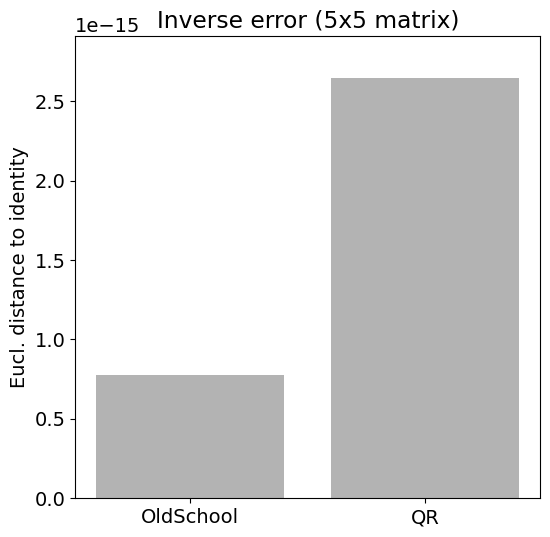

In [106]:
trueI = np.eye(n)
sse = [0,0] 
sse[0] = np.sqrt(np.sum((AAi_old-trueI)**2))
sse[1] = np.sqrt(np.sum((AAi_qr-trueI )**2))


plt.figure(figsize=(6,6))

plt.bar(range(2),sse,color=[.7,.7,.7])
plt.xticks(range(2),labels=['OldSchool','QR'])
plt.ylim([0,np.max(sse)*1.1])
plt.ylabel('Eucl. distance to identity')
plt.title(f'Inverse error ({n}x{n} matrix)',ha='center')
plt.show()

- 위 과정을 $5\times 5$인 경우와, $30\times 30$인 경우에 각각 100번 반복
    $\rightarrow$ 행렬의 차원이 커질수록, QR분해에 따른 역행렬이 단위 행렬에 더욱더 가까워짐

In [107]:
n = 5

numExprs = 100

sse = np.zeros((numExprs,2))

for expi in range(numExprs):

  A = np.random.randn(n,n)

  Ainv_old = np.linalg.inv(A)
  AAi_old  = Ainv_old@A

  Q,R = np.linalg.qr(A)
  Ainv_qr = np.linalg.inv(R)@Q.T 
  AAi_qr  = Ainv_qr@A

  trueI = np.eye(n)
  sse[expi,0] = np.sqrt(np.sum((AAi_old-trueI)**2))
  sse[expi,1] = np.sqrt(np.sum((AAi_qr-trueI )**2))

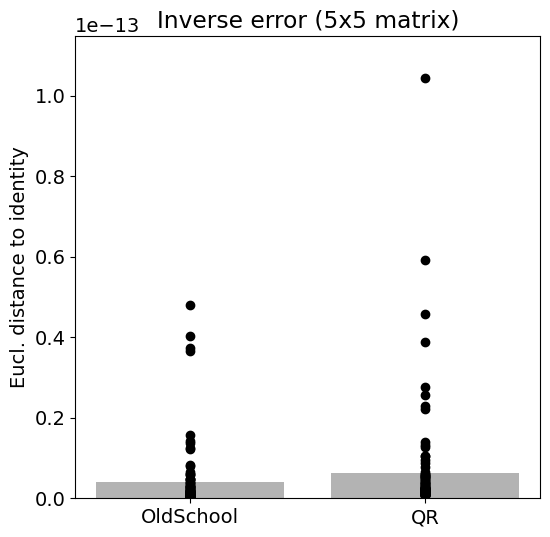

In [108]:
plt.figure(figsize=(6,6))

plt.plot(np.zeros(numExprs),sse[:,0],'ko')
plt.plot(np.ones(numExprs),sse[:,1],'ko')
plt.bar(range(2),np.mean(sse,axis=0),color=[.7,.7,.7])

plt.xticks(range(2),labels=['OldSchool','QR'])
plt.ylim([0,np.max(sse)*1.1])
plt.ylabel('Eucl. distance to identity')
plt.title(f'Inverse error ({n}x{n} matrix)',ha='center')
plt.show()

In [109]:
n = 30

numExprs = 100

sse = np.zeros((numExprs,2))

for expi in range(numExprs):

  A = np.random.randn(n,n)

  Ainv_old = np.linalg.inv(A)
  AAi_old  = Ainv_old@A

  Q,R = np.linalg.qr(A)
  Ainv_qr = np.linalg.inv(R)@Q.T 
  AAi_qr  = Ainv_qr@A

  trueI = np.eye(n)
  sse[expi,0] = np.sqrt(np.sum((AAi_old-trueI)**2))
  sse[expi,1] = np.sqrt(np.sum((AAi_qr-trueI )**2))

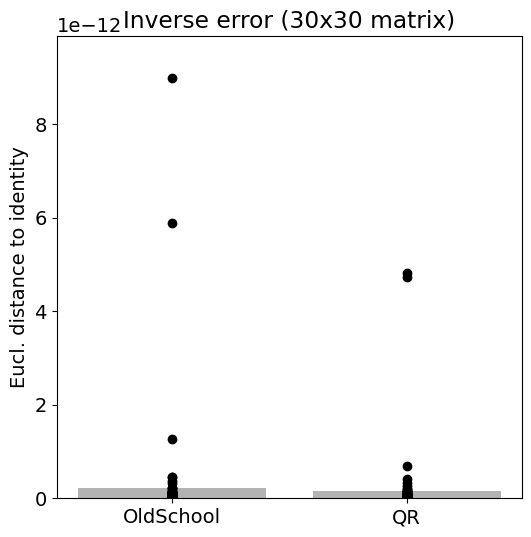

In [110]:
plt.figure(figsize=(6,6))

plt.plot(np.zeros(numExprs),sse[:,0],'ko')
plt.plot(np.ones(numExprs),sse[:,1],'ko')
plt.bar(range(2),np.mean(sse,axis=0),color=[.7,.7,.7])

plt.xticks(range(2),labels=['OldSchool','QR'])
plt.ylim([0,np.max(sse)*1.1])
plt.ylabel('Eucl. distance to identity')
plt.title(f'Inverse error ({n}x{n} matrix)',ha='center')
plt.show()